<font color=black></font>

## Introduction

In this notebook, we'll explore Nasa's asteroids information dataset in order to:

- Finding potential hazardous and non-hazardous asteroids
- Features responsible for claiming an asteroid to be hazardous

We'll perform some data preparation and use different models to predict if an asteroid is hazardous or not

#### Import relevant packages and load the dataset:

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, recall_score
%matplotlib inline

In [28]:
df = pd.read_csv('nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [10]:
df.shape

(4687, 40)

Dataset consist of 4687 samples and 40 features. The **'Hazardous'** independent feature has boolean values so we convert it to binary values.

In [29]:
df['Hazardous'] = df['Hazardous'].astype(int)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


#### Check for missing values:

In [12]:
df.isnull().values.any()

False

#### Explore columns types:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Majority of types are contininuous except for 4 columns: **'Close Approach Date'**, **'Orbit Determination Date'**, **Orbiting Body'** and **'Equinox'**. <br> Let's look into them:

In [15]:
pd.unique(df['Close Approach Date'])

array(['1995-01-01', '1995-01-08', '1995-01-15', '1995-01-22',
       '1995-02-08', '1995-02-15', '1995-02-22', '1995-03-08',
       '1995-03-15', '1995-03-22', '1995-04-08', '1995-04-15',
       '1995-04-22', '1995-05-08', '1995-05-15', '1995-05-22',
       '1995-06-08', '1995-06-15', '1995-06-22', '1995-07-08',
       '1995-07-15', '1995-07-22', '1995-08-08', '1995-08-15',
       '1995-08-22', '1995-09-08', '1995-09-15', '1995-09-22',
       '1995-10-08', '1995-10-15', '1995-10-22', '1995-11-08',
       '1995-11-15', '1995-11-22', '1995-12-08', '1995-12-15',
       '1995-12-22', '1996-01-08', '1996-01-15', '1996-01-22',
       '1996-02-08', '1996-02-15', '1996-02-22', '1996-03-08',
       '1996-03-22', '1996-04-08', '1996-04-15', '1996-04-22',
       '1996-05-08', '1996-05-15', '1996-05-22', '1996-06-08',
       '1996-06-15', '1996-06-22', '1996-07-08', '1996-07-15',
       '1996-07-22', '1996-08-08', '1996-08-15', '1996-08-22',
       '1996-09-08', '1996-09-15', '1996-09-22', '1996-

This column contains only dates so we can convert in to int.

In [30]:
df['Close Approach Date'] = pd.to_numeric(df['Close Approach Date'].str.replace("-",""))

In [17]:
pd.unique(df['Orbit Determination Date'])

array(['2017-04-06 08:36:37', '2017-04-06 08:32:49',
       '2017-04-06 09:20:19', ..., '2017-04-06 08:23:43',
       '2017-04-06 08:23:42', '2017-04-29 06:18:33'], dtype=object)

This column contains both date and time stamp.
<br>We convert this column to datetime, split using dt attribute to date and time and replace the existing column with only date value.

In [31]:
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date']).dt.date
df['Orbit Determination Date'] = pd.to_numeric(df['Orbit Determination Date'].apply(str).str.replace("-",""))

In [19]:
pd.unique(df['Orbiting Body'])

array(['Earth'], dtype=object)

In [20]:
pd.unique(df['Equinox'])

array(['J2000'], dtype=object)

Both columns contains single value so we can delete them.

In [32]:
df.drop(['Orbiting Body', 'Equinox'], axis = 1, inplace = True)

#### Check data again:

In [33]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date               int64
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbit ID                          int64
Orbit Determination Date          int64
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64


In [23]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


**'Neo Reference ID'** and **'Name'** are irrelevant for classification so we'll delete them.

In [34]:
df.drop(['Neo Reference ID', 'Name'], axis = 1, inplace = True)

**'Est Dia'** repeats itself with different units. We'll leave only **KM** for calculating average from **min** and **max** values and replace this column with average one.

In [35]:
df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 
         'Est Dia in Feet(max)'], axis = 1, inplace = True)

In [36]:
dia_avg = df[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis = 1)
df.insert(loc = 1, column = 'Mean Est Dia', value = dia_avg)
df.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)'], axis = 1, inplace = True)

**'Miss Dist'** repeats itself with different units.  We'll leave only **KM** and delete the rest.

In [37]:
df.drop(['Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)'], axis = 1, inplace = True)

**'Relative Velocity'** repeats itself with different units. We'll leave only **KM per hour** and delete the rest.

In [38]:
df.drop(['Relative Velocity km per sec'], axis = 1, inplace = True)

#### Check the data:

In [39]:
df.head()

,Absolute Magnitude,Mean Est Dia,Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(kilometers),Orbit ID,Orbit Determination Date,Orbit Uncertainity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.205846,19950101,788947200000,22017.003799,13680.509944,62753692.0,17,20170406,5,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.236343,19950101,788947200000,65210.346095,40519.173105,57298148.0,21,20170406,3,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.374578,19950108,789552000000,27326.560182,16979.661798,7622911.5,22,20170406,0,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.014241,19950115,790156800000,40225.948191,24994.839864,42683616.0,7,20170406,6,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.205846,19950115,790156800000,35426.991794,22012.954985,61010824.0,25,20170406,1,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [60]:
# This warning suppression is for sns.scatterplot
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Divide data to dependent and independent variables.

In [63]:
X, y = df.iloc[:, :-1], df.iloc[:,-1]

Split them to train and test datasets before apply any preproccesing techniques.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

Visualize our data using **TSNE** technique:

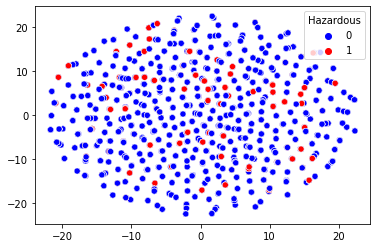

In [65]:
tsne = TSNE(n_components = 2, perplexity = 10, n_iter = 300)
tsne_res = tsne.fit_transform(X)

sns.scatterplot(tsne_res[:,0], tsne_res[:,1], hue = y, legend = 'full', palette = ['b', 'r'])
plt.show()

Let's look how many hazardous asteroids there are.

In [42]:
classes = pd.value_counts(df['Hazardous'])
classes

0    3932
1     755
Name: Hazardous, dtype: int64

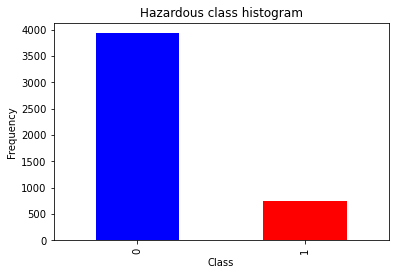

In [48]:
classes.plot(kind = 'bar', color = ['b', 'r'])
plt.title('Hazardous class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [52]:
print(f'Percentage of hazardous asteroids is: {classes[1]*100/df.shape[0]:.2f}%')

Percentage of hazardous asteroids is: 16.11%


We have 16% of hazardous asteroids so data is medium imbalanced.
<br>**Random oversampling** simply replicates randomly the minority class examples and is known to increase the likelihood of occurring overfitting.
<br>We'll use **SMOTE** method to avoid the over-fitting problem on training dataset.
This method generates synthetic data based on the feature space similarities between 
existing minority instances using K-nearest neighbors and  linear interpolations.

In [66]:
smote = SMOTE(random_state = 42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [67]:
classes_over = pd.value_counts(y_train_over)
print(classes_over)

1    2752
0    2752
Name: Hazardous, dtype: int64


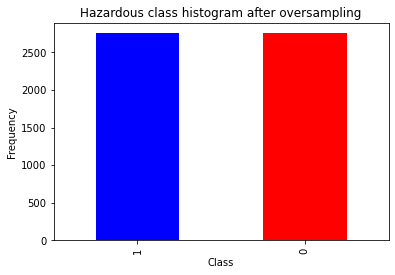

In [68]:
classes_over.plot(kind = 'bar', color = ['b', 'r'])
plt.title('Hazardous class histogram after oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

After oversampling, quantity of both classes is equal.

#### Create a new dataset to check data distribution and correlation:

In [70]:
df_over = pd.concat([X_train_over, y_train_over], axis = 1)

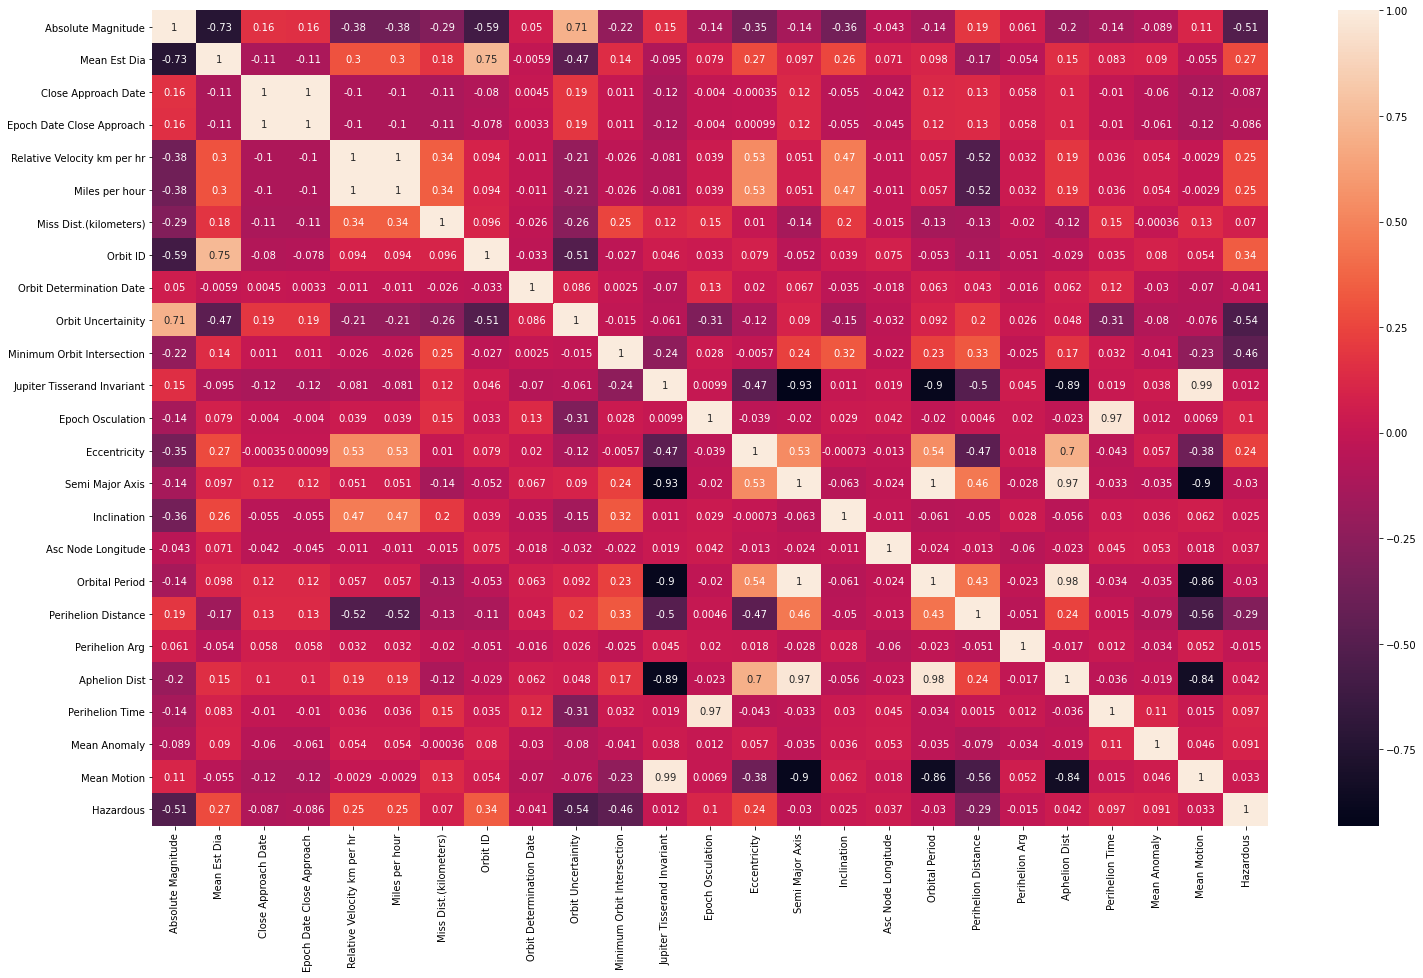

In [71]:
plt.figure(figsize = (25, 15))
corr = df_over.corr()
sns.heatmap(corr, annot = True)
plt.show()

We can see negative correlation between **'Absolute Magnitude'**, **'Orbit Uncertainity'**,
**'Minimum Orbit Intersection'**, **'Perihelion Distance'** features and target values.
The lower the value, the greater the probability of hazardous asteroid.
<br>Let's see how those features are distributed:

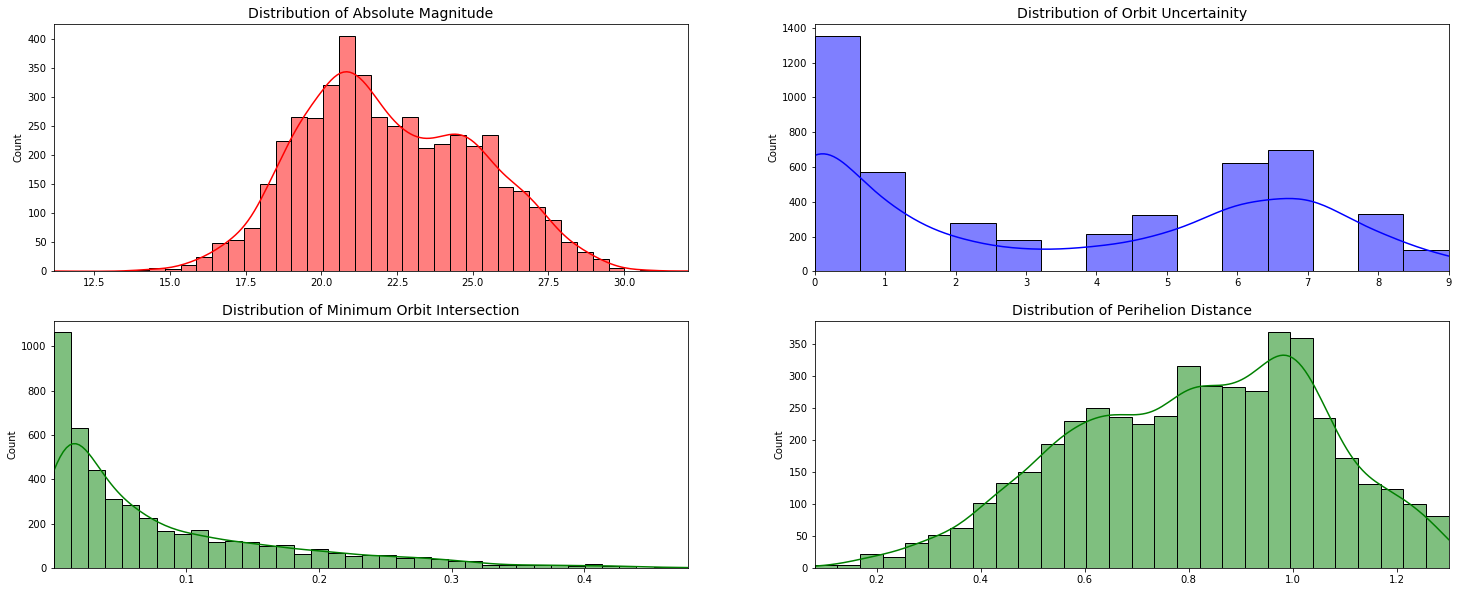

In [72]:
fig, ax = plt.subplots(2, 2, figsize = (25,10))

absolute_magnitude_val = df['Absolute Magnitude'].values
orbit_uncertainity_val = df['Orbit Uncertainity'].values
minimum_orbit_intersection_val = df['Minimum Orbit Intersection'].values
perihelion_distance_val = df['Perihelion Distance'].values

sns.histplot(absolute_magnitude_val, ax = ax[0,0], color = 'r', kde = True)
ax[0,0].set_title('Distribution of Absolute Magnitude', fontsize = 14)
ax[0,0].set_xlim([min(absolute_magnitude_val), max(absolute_magnitude_val)])

sns.histplot(orbit_uncertainity_val, ax = ax[0,1], color = 'b', kde = True)
ax[0,1].set_title('Distribution of Orbit Uncertainity', fontsize = 14,)
ax[0,1].set_xlim([min(orbit_uncertainity_val), max(orbit_uncertainity_val)])

sns.histplot(minimum_orbit_intersection_val, ax = ax[1,0], color = 'g', kde = True)
ax[1,0].set_title('Distribution of Minimum Orbit Intersection', fontsize = 14,)
ax[1,0].set_xlim([min(minimum_orbit_intersection_val), max(minimum_orbit_intersection_val)])

sns.histplot(perihelion_distance_val, ax = ax[1,1], color = 'g', kde = True)
ax[1,1].set_title('Distribution of Perihelion Distance', fontsize = 14,)
ax[1,1].set_xlim([min(perihelion_distance_val), max(perihelion_distance_val)])

plt.show()

**'Absolute Magnitude'** has a normal distribution. 
<br>**'Orbit Uncertainity'** has a bi-model distribution, it's not uncommon to believe that the data comes from a mixture of two normal distributions
<br>**'Minimum Orbit Intersection'** has a skewed distribution indicating that it is not normal.
<br>**'Perihelion Distance'** has a approximately normal distribution.

Have a closer look using boxplot:

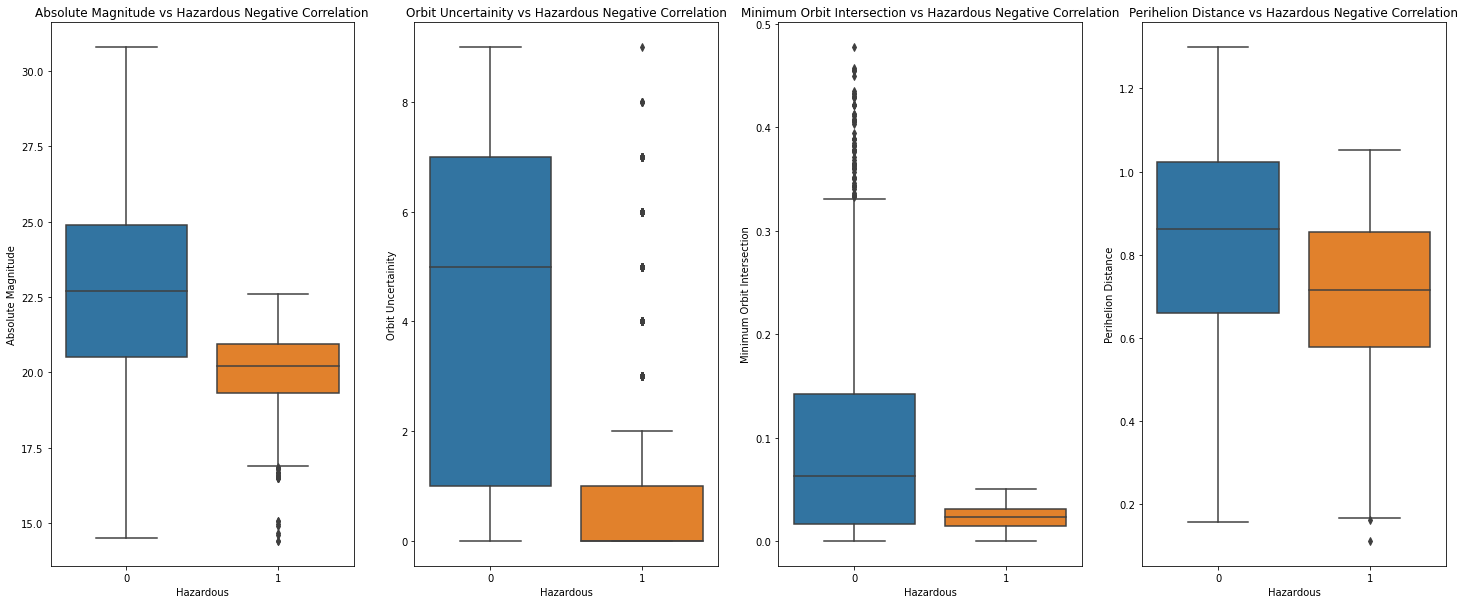

In [73]:
f, axes = plt.subplots(ncols = 4, figsize = (25,10))

sns.boxplot(x = 'Hazardous', y = 'Absolute Magnitude', data = df_over, ax = axes[0])
axes[0].set_title('Absolute Magnitude vs Hazardous Negative Correlation')

sns.boxplot(x = 'Hazardous', y = 'Orbit Uncertainity', data = df_over, ax = axes[1])
axes[1].set_title('Orbit Uncertainity vs Hazardous Negative Correlation')

sns.boxplot(x = 'Hazardous', y = 'Minimum Orbit Intersection', data = df_over, ax = axes[2])
axes[2].set_title('Minimum Orbit Intersection vs Hazardous Negative Correlation')

sns.boxplot(x = 'Hazardous', y = 'Perihelion Distance', data = df_over, ax = axes[3])
axes[3].set_title('Perihelion Distance vs Hazardous Negative Correlation')

plt.show()

We'll leave outliers for now in order to avoid an information loss and see later how accurate
will be our models.

Apply feature scaling for distance algorithms like **KNN** and **SVM**. We'll use **Standardization** technique and see the model's results.

In [74]:
scaler = StandardScaler().fit(X_train_over)
X_train_over = scaler.transform(X_train_over)
X_test = scaler.transform(X_test)

#### Evaluate optional models:
Our data is mainly circular so logistic regression probably won't be the best idea. 
<br>We'll evaluate **Naive Bayes**, **Random Forest**, **KNearestNeighbors** and **SVM Classifier with RBF kernel** which is useful when the data-points are not linearly separable.
<br>Start with default hyperparameters.

In [75]:
clf_nb = GaussianNB()
clf_rf = RandomForestClassifier(random_state = 42)
clf_svm = SVC()
clf_knn = KNeighborsClassifier()

Use **cross_val_score** helper function for cross validation with default 5-fold.

In [77]:
models = [clf_nb, clf_rf, clf_svm, clf_knn]
accuracy_list = []
for model in models:
    accuracy = cross_val_score(model, X_train_over, y_train_over, scoring = 'accuracy')
    accuracy_list.append(np.mean(accuracy))

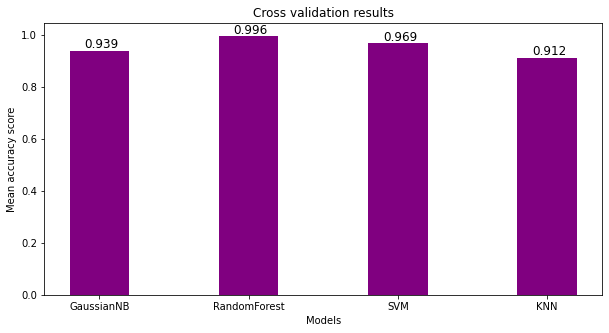

In [78]:
models_list = ['GaussianNB', 'RandomForest', 'SVM', 'KNN']
plt.figure(figsize = (10, 5))
plt.bar(models_list, accuracy_list, color ='purple', width = 0.4)  
for index,data in enumerate(accuracy_list):
    plt.text(x = index-0.1 , y = data+0.01, s = f'{round(data, 3)}' , 
             fontdict = dict(fontsize = 12))
plt.xlabel('Models') 
plt.ylabel('Mean accuracy score') 
plt.title('Cross validation results') 
plt.show() 

**Random forest** gives us better result among other algorithms with **accuracy** score.

#### Apply it on the test dataset:

In [84]:
clf_rf.fit(X_train_over, y_train_over)
y_pred = clf_rf.predict(X_test)
print(f'Test accuracy: {accuracy_score(y_test, y_pred):.4f}')

Test accuracy: 0.9972


Test accuracy is great too. In addition, we'll evaluate the accuracy with **confusion matrix**.     

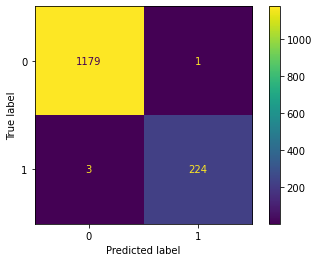

In [85]:
plot_confusion_matrix(clf_rf, X_test, y_test)  
plt.show()

In [86]:
recall = recall_score(y_test, y_pred)
error = round((1 - recall)*100, 2)
print(f'Recall value is: {recall:.4f}')
print(f'The error in identifying hazardous asteroids is {error}%')  

Recall value is: 0.9868
The error in identifying hazardous asteroids is 1.32%


## Summary:

## Our model classifies asteroids pretty well with:
- 99.72% accuracy
- 0.9868 recall value / 1.32% error in identifying hazardous asteroids

After fitting and evaluating the model, let's check which features were most important.

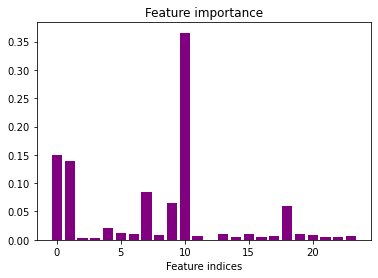

Most important features in decsending order: Minimum Orbit Intersection, Absolute Magnitude, Mean Est Dia


In [83]:
importance = clf_rf.feature_importances_
plt.bar([x for x in range(len(importance))], importance, color = 'purple')
plt.title('Feature importance')
plt.xlabel('Feature indices')
plt.show()
print(f'Most important features in decsending order: {df.columns[10]}, {df.columns[0]}, {df.columns[1]}')

According to heatmap, **'Mean Est Dia'** didn't have high correlation with our target column but it had high negative correlation with **'Absolute Magnitude'**.

In the end, we had nice scores without the need of hyperparameter tuning.